# CARE-*less* care
---

#### Usage:

A **code cell** will either:
* import required modules
* produce GUI elements for setting parameters or input files
* execute a CARE processing step
* an execution is finished, when the *-symbol left of the code cell disappears

Use **SHIFT+ENTER** to execute the selected code cell and step through the notebook

#### Note:
* CARE requires perfectly alligned pairs of low and high quality images for training. The low quality image can have a by a factor of 2 lower resoltion. 
* After training, new, low quality images can be predicted with the trained model.
* Input images will be loaded with the Bioformats library (supports e. g. tif, czi, lsm, etc.)
* 2D, 3D and movies are supported.
* Each channel will be processed independently
* For more information visit the [CARE-less](https://git.ist.ac.at/csommer/careless) or the [CARE](http://csbdeep.bioimagecomputing.com/) webpage

In [1]:
from careless.care import care

## 0. Create or load project file
___
if project has been trained already, you can jump to section **4. Prediction** after loading the project file

In [2]:
care.select_project()

## 1. Input files and parameters
---

if project has been trained already, you can jump to section **4. Prediction** after loading the project file

In [3]:
care.select_input()

## 2. Extract training data
___

In [4]:
care.select_patch_parameter()

-- Creating 108 patches for channel: 0
Saving data to C:\Users\csommer\Desktop\CARElessDATA\train_data\patches\CH_0_training_patches.npz.


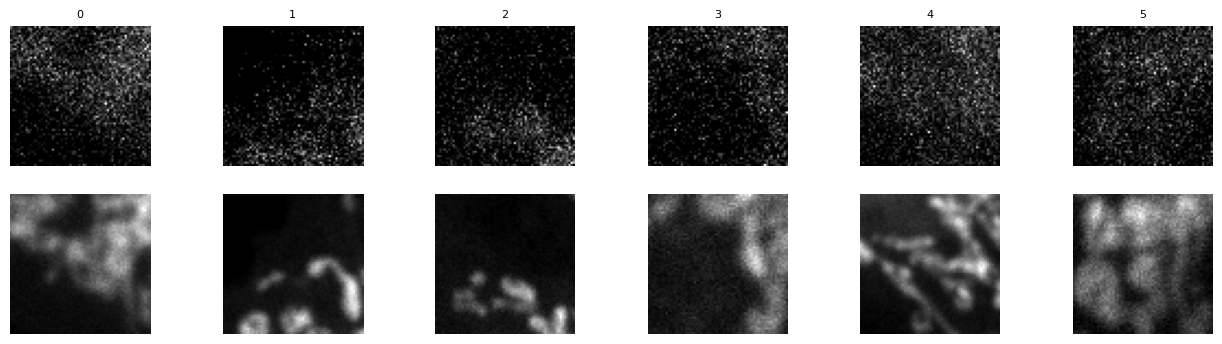

Done


In [5]:
care.params.save()
care.CareTrainer().create_patches()

## 3. Training
---

In [6]:
care.select_train_paramter()
care.select_probabilistic()

HTML(value='<i><b>experimental</b>, prediction output will contain mean and scale as channels</i>')

-- Training channel 0...
Epoch 1/2
Cause: could not parse the source code of <function _mean_or_not.<locals>.<lambda> at 0x000002C480638310>: found multiple definitions with identical signatures at the location. This error may be avoided by defining each lambda on a single line and with unique argument names. The matching definitions were:
Match 0:
lambda x: K.mean(x, axis=-1)

Match 1:
lambda x: x

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function _mean_or_not.<locals>.<lambda> at 0x000002C4808B7040>: found multiple definitions with identical signatures at the location. This error may be avoided by defining each lambda on a single line and with unique argument names. The matching definitions were:
Match 0:
lambda x: K.mean(x, axis=-1)

Match 1:
lambda x: x

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of

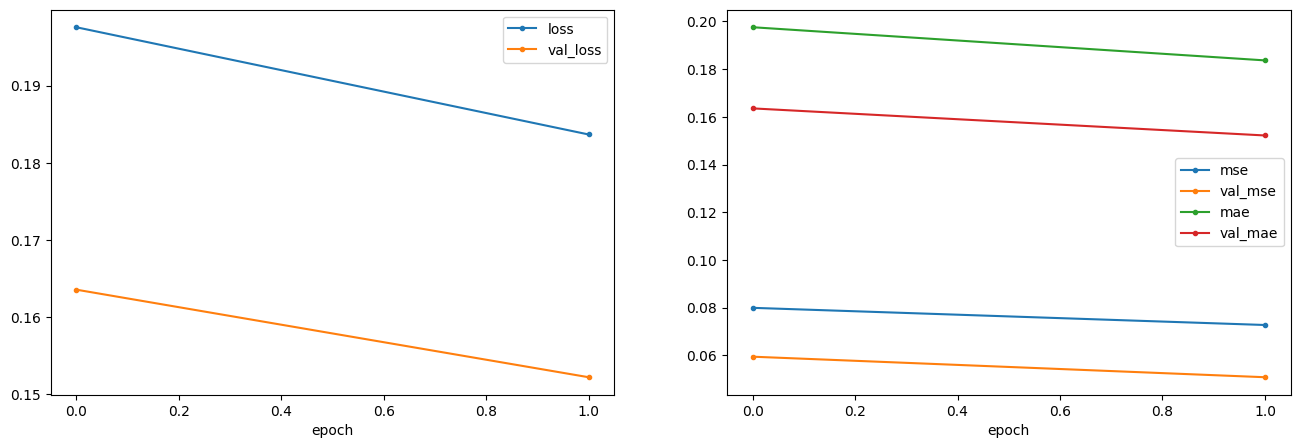

1/1 [==============================] - 0s 203ms/step


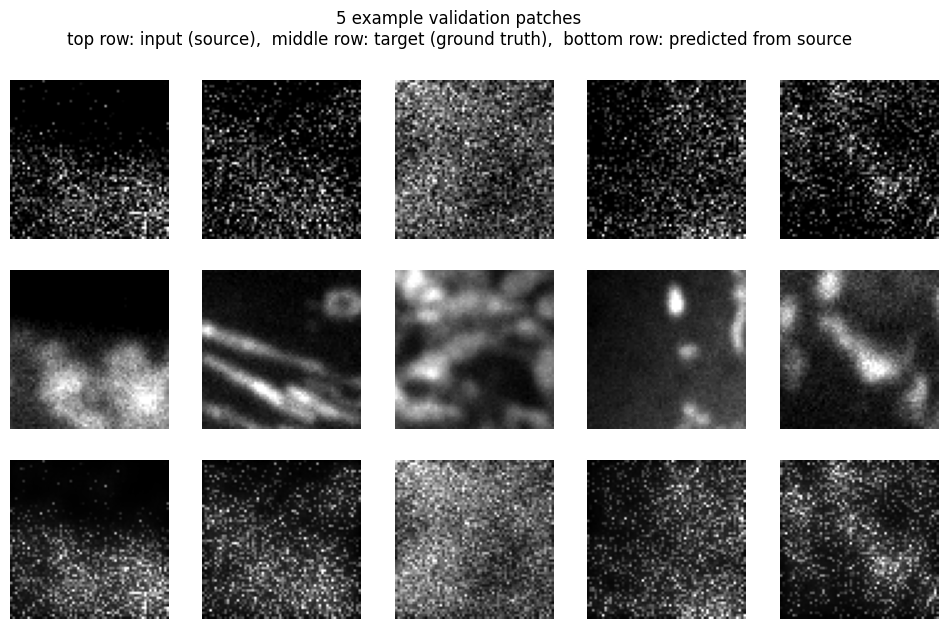

-- Export model for use in Fiji...

Model exported in TensorFlow's SavedModel format:
C:\Users\csommer\Desktop\CARElessDATA\models\CH_0_model\TF_SavedModel.zip
Done
[Training]
Elapsed: 34.16557812690735 sec.


In [7]:
care.params.save()
care.CareTrainer().train()

## 4. Prediction
---
**requires a loaded and trained project**
* Images will be tiled according to the **n_tiles** (z,y,x) parameter. (usefull for big images)

In [9]:
predict_file = care.select_file_to_predict()

In [ ]:
care.CareTrainer().predict_multiple( predict_file.value, n_tiles=(1,4,4) )